<a href="https://www.kaggle.com/code/kareemakompf/gradientdescent?scriptVersionId=118600849" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-with-age-and-experience/Salary_Data.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
import sklearn.metrics as mt
import plotly.graph_objects as go 

In [3]:
class InputNotArrayException(Exception):
    def __init__(self, message = 'Given input is not an array nor dataframe'):
        self.message = message 
        super().__init__(message)

        
class BatchGradientDescent():
    
    def __init__(self, epochs = 10, learning_rate = 0.0001, threshold = 0.0000001):
        self.learning_rate = learning_rate 
        self.epochs = epochs 
        self.threshold = threshold
        self.coef_ = None 
    
    def fit(self, X, y):
        
        expression = not ((isinstance(X, np.ndarray) and isinstance(y, np.ndarray)) or (isinstance(X, pd.DataFrame) and isinstance(y, pd.DataFrame)) or (isinstance(X, pd.Series) and isinstance(y, pd.Series)))
        if expression:
            raise InputNotArrayException()
        elif  (isinstance(X, pd.DataFrame) and isinstance(y, pd.DataFrame)) or (isinstance(X, pd.Series) and isinstance(y, pd.Series)):
            X, y = X.values, y.values 
        rows, cols = X.shape

        X = np.hstack([X, np.ones((rows, 1))])        
        y = y.reshape(rows, 1)
        B = np.zeros((cols + 1, 1))
        
        for i in range(self.epochs):
            # Find the gradient at that point 
            
            slopes = -2*X.T.dot(y - X.dot(B))
            B = B - self.learning_rate*slopes
            
        self.coef_ = B
        
        return self 
    
    def predict(self, X):
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series): X = X.values
        elif not isinstance(X, np.ndarray): raise InputNotArrayException()
        rows, cols = X.shape
        X = np.hstack([X, np.ones((rows, 1))])
        return X.dot(self.coef_)
    
    def score(self, X, y):
        
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series): X = X.values
        elif not isinstance(X, np.ndarray): raise InputNotArrayException()
        rows, cols = X.shape
        
        y_preds = self.predict(X)
        R2 = mt.r2_score(y, y_preds)
        
        return R2 
           
        

In [4]:
class StochasticGradientDescent():
    
    def __init__(self, epochs = 1000, learning_rate = 0.0001, threshold = 0.0000001):
        self.learning_rate = learning_rate 
        self.epochs = epochs 
        self.threshold = threshold
        self.coef_ = None 
    
    def fit(self, X, y):
        
        expression = not ((isinstance(X, np.ndarray) and isinstance(y, np.ndarray)) or (isinstance(X, pd.DataFrame) and isinstance(y, pd.DataFrame)) or (isinstance(X, pd.Series) and isinstance(y, pd.Series)))
        if expression:
            raise InputNotArrayException()
        elif  (isinstance(X, pd.DataFrame) and isinstance(y, pd.DataFrame)) or (isinstance(X, pd.Series) and isinstance(y, pd.Series)):
            X, y = X.values, y.values 
        
        rows, cols = X.shape

        X = np.hstack([X, np.ones((rows, 1))])        
        y = y.reshape(rows, 1)
        B = np.zeros((cols + 1, 1))
        
        for i in range(self.epochs):
            # Find the gradient at that point 
            
            for j in range(rows):
                idx = np.random.randint(0, rows)
                
                slopes = -2*X.T[:, idx]*(y[idx] - X[idx, :].dot(B))
                B = B - self.learning_rate*slopes.reshape(cols+1, 1)
                
        self.coef_ = B
        
        return self 
    
    def predict(self, X):
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series): X = X.values
        elif not isinstance(X, np.ndarray): raise InputNotArrayException()
        rows, cols = X.shape
        X = np.hstack([X, np.ones((rows, 1))])
        return X.dot(self.coef_)
    
    def score(self, X, y):
        
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series): X = X.values
        elif not isinstance(X, np.ndarray): raise InputNotArrayException()
        rows, cols = X.shape
        
        y_preds = self.predict(X)
        R2 = mt.r2_score(y, y_preds)

        return R2 
    

In [5]:
class MiniBatchGradientDescent():
    
    def __init__(self, epochs = 1000, learning_rate = 0.0001, threshold = 0.0000001, batch_size = 40):
        self.learning_rate = learning_rate 
        self.epochs = epochs 
        self.threshold = threshold
        self.batch_size = batch_size 
        self.coef_ = None 
    
    def fit(self, X, y):
        
        expression = not ((isinstance(X, np.ndarray) and isinstance(y, np.ndarray)) or (isinstance(X, pd.DataFrame) and isinstance(y, pd.DataFrame)) or (isinstance(X, pd.Series) and isinstance(y, pd.Series)))
        if expression:
            raise InputNotArrayException()
        elif  (isinstance(X, pd.DataFrame) and isinstance(y, pd.DataFrame)) or (isinstance(X, pd.Series) and isinstance(y, pd.Series)):
            X, y = X.values, y.values 
        
        rows, cols = X.shape

        X = np.hstack([X, np.ones((rows, 1))])        
        y = y.reshape(rows, 1)
        B = np.zeros((cols + 1, 1))
        
        for i in range(self.epochs):
            # Find the gradient at that point 
            
            for j in range(rows):
                idx = np.random.randint(0, rows, size = (self.batch_size, ))
                
                slopes = -2*X.T[:, idx].dot(y[idx] - X[idx, :].dot(B))
                B = B - self.learning_rate*slopes.reshape(cols+1, 1)
                
        self.coef_ = B
        
        return self 
    
    def predict(self, X):
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series): X = X.values
        elif not isinstance(X, np.ndarray): raise InputNotArrayException()
        rows, cols = X.shape
        X = np.hstack([X, np.ones((rows, 1))])
        return X.dot(self.coef_)
    
    def score(self, X, y):
        
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series): X = X.values
        elif not isinstance(X, np.ndarray): raise InputNotArrayException()
        rows, cols = X.shape
        
        y_preds = self.predict(X)
        R2 = mt.r2_score(y, y_preds)

        return R2 
    

In [6]:
df = pd.read_csv('/kaggle/input/salary-data-with-age-and-experience/Salary_Data.csv')
df

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


In [7]:

X, y = df.iloc[:, :-1], df.iloc[:, -1]
gd = BatchGradientDescent(learning_rate = 0.00003, epochs=870)
gd.fit(X.values, y.values)

In [8]:
gd.score(X.values, y.values)

0.9598679993977606

In [9]:
best_score  = 0
epoch = {}
for i in range(1, 300):
    sgd = StochasticGradientDescent(epochs = i, learning_rate = 0.001)
    sgd.fit(X.values, y.values)
    current_score = sgd.score(X.values, y.values)
    
    best_score = current_score 
    epoch[i] = current_score 
        
        
        
    
    

In [10]:
epochs_df = pd.DataFrame({'epochs':list(epoch.keys()), 'accuracy':list(epoch.values())})
epochs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   epochs    299 non-null    int64  
 1   accuracy  299 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


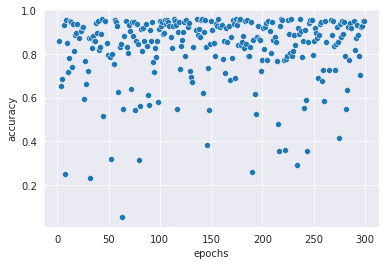

In [11]:
sns.set_style('darkgrid')
sns.scatterplot(x = 'epochs', y = 'accuracy', data = epochs_df.loc[epochs_df.accuracy > 0, :])
plt.show()

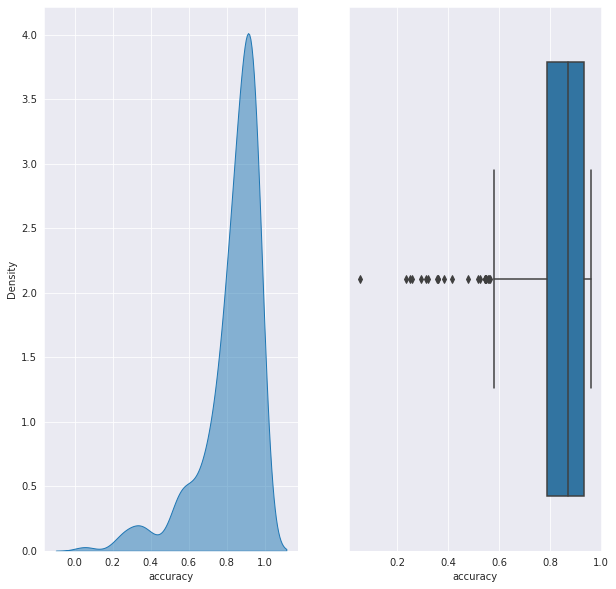

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 2, 1)
sns.kdeplot(x = 'accuracy', data = epochs_df.loc[epochs_df.accuracy > 0, :], ax= ax, fill=True, alpha = 0.5)
ax = fig.add_subplot(1, 2, 2)
sns.boxplot(x = 'accuracy', data = epochs_df.loc[epochs_df.accuracy > 0, :], ax = ax)
plt.show()



In [13]:
%%timeit
sgd = StochasticGradientDescent(epochs = 58, learning_rate = 0.0008)
sgd.fit(X.values, y.values)
sgd.score(X.values, y.values)

21.6 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
sgd.score(X.values, y.values)

0.9535325332200093

In [15]:
sgd.coef_

array([[6323.0388436 ],
       [1519.92185039],
       [-801.32767429]])

In [16]:
gd.coef_

array([[6707.56267051],
       [1506.17389487],
       [-601.04989628]])

In [17]:
mbgd = MiniBatchGradientDescent(epochs = 7, learning_rate = 0.00001, batch_size = 100)
mbgd.fit(X.values, y.values)
mbgd.score(X.values, y.values)

0.9424427210128169

In [18]:
mbgd.coef_

array([[5117.71531002],
       [1899.2358504 ],
       [-406.11572396]])